In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [4]:
%%time
df=pd.read_csv('/Users/shivamsourav/Desktop/dataset.csv')

CPU times: user 14 s, sys: 2.68 s, total: 16.7 s
Wall time: 17.3 s


In [5]:
df.shape

(5956842, 24)

In [6]:
df.columns

Index(['Index', 'pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Color',
       'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity',
       'Chlorine', 'Manganese', 'Total Dissolved Solids', 'Source',
       'Water Temperature', 'Air Temperature', 'Month', 'Day', 'Time of Day',
       'Target'],
      dtype='object')

In [7]:
df['Target'].unique()

array([0, 1])

In [8]:
df.isnull().sum()

Index                          0
pH                        116054
Iron                       39753
Nitrate                   105725
Chloride                  175531
Lead                       26909
Zinc                      156126
Color                       5739
Turbidity                  49815
Fluoride                  189156
Copper                    199402
Odor                      178891
Sulfate                   197418
Conductivity              163861
Chlorine                   57825
Manganese                 109583
Total Dissolved Solids      1670
Source                     88262
Water Temperature         168233
Air Temperature            29728
Month                      95668
Day                        99603
Time of Day               114519
Target                         0
dtype: int64

In [9]:
df['Color'].unique()

array(['Colorless', 'Faint Yellow', 'Light Yellow', 'Near Colorless',
       'Yellow', nan], dtype=object)

In [10]:
df['Color'].value_counts()

Colorless         1787911
Near Colorless    1786234
Faint Yellow      1079772
Light Yellow       758138
Yellow             539048
Name: Color, dtype: int64

In [11]:
df['Source'].value_counts()

Stream       734502
Ground       734389
Well         734315
Aquifer      733778
Reservoir    733298
River        732980
Spring       732700
Lake         732618
Name: Source, dtype: int64

In [12]:
df['Source']=df['Source'].fillna('Other',axis=0)

In [13]:
df.head(1)

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,Colorless,0.022683,0.607283,...,3.708178,2.269945e-15,332.118789,Other,NaN,43.493324,January,29.0,4.0,0


In [14]:
df['Color']=df['Color'].fillna('Colorless',axis=0)
df['Color'].value_counts()

Colorless         1793650
Near Colorless    1786234
Faint Yellow      1079772
Light Yellow       758138
Yellow             539048
Name: Color, dtype: int64

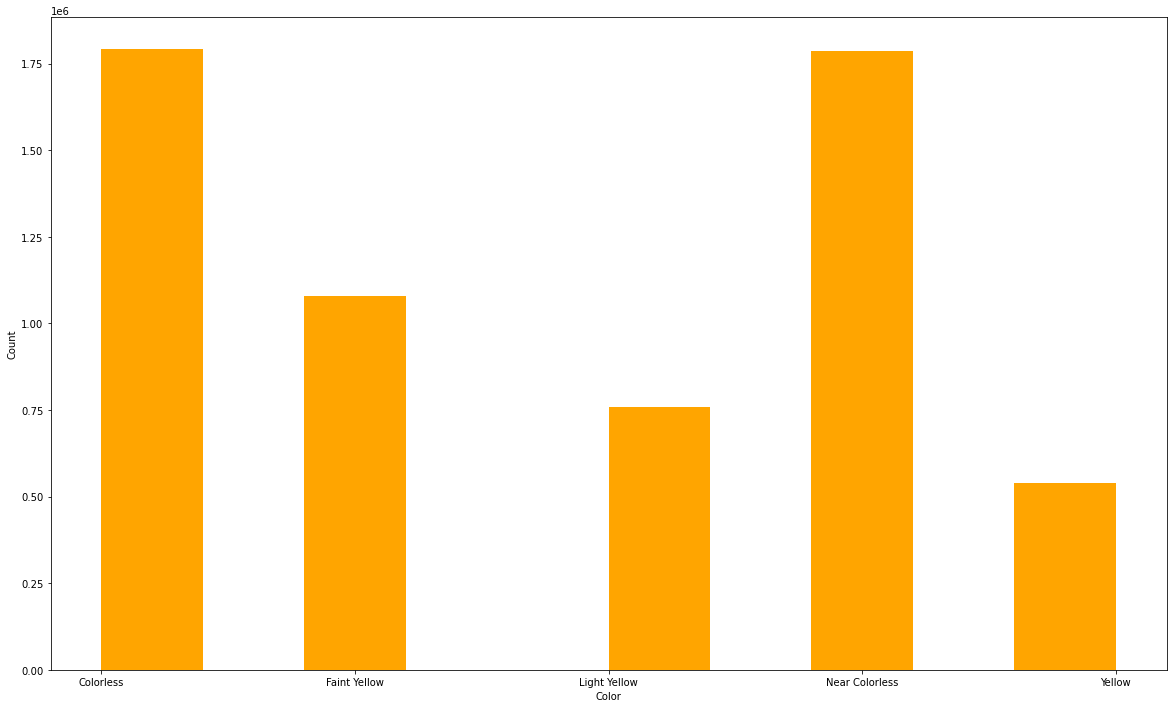

In [15]:
plt.figure(figsize=(20,12))
plt.hist(df['Color'],color='orange')
plt.xlabel('Color')
plt.ylabel('Count')
plt.show()

/var/folders/0n/xc9648gx0gsbnhr2j2xllfr00000gn/T/ipykernel_42852/2979032150.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(round(df.corr(),3),annot=True,cmap='coolwarm')


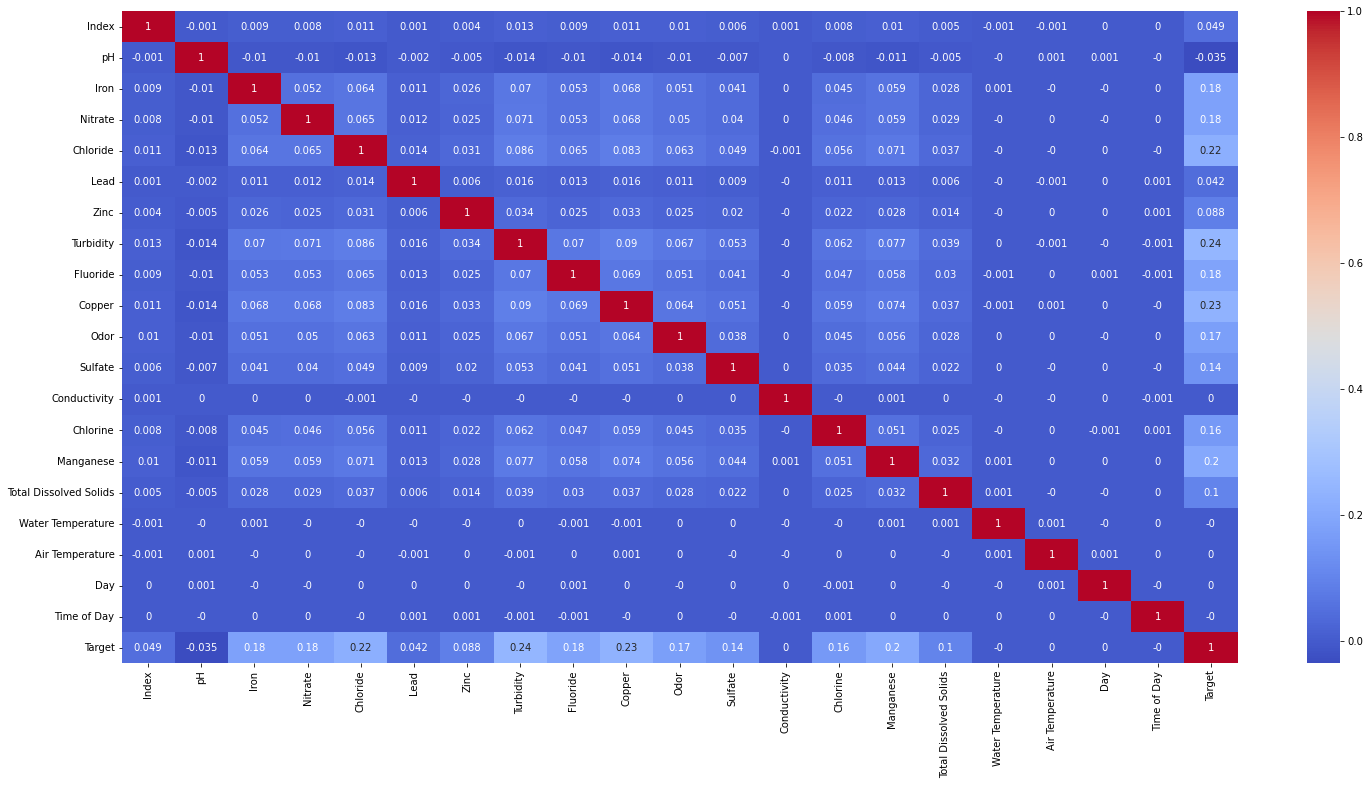

In [16]:
import seaborn as sns
plt.figure(figsize=(25,12))
sns.heatmap(round(df.corr(),3),annot=True,cmap='coolwarm')
plt.show()

In [17]:
df=df.drop(['Index','pH','Conductivity','Water Temperature','Air Temperature','Day','Time of Day'],axis=1)
df.shape

(5956842, 17)

In [18]:
df.head(1)

,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,Odor,Sulfate,Chlorine,Manganese,Total Dissolved Solids,Source,Month,Target
0,0.000083,8.605777,122.799772,3.713298e-52,3.434827,Colorless,0.022683,0.607283,0.144599,1.626212,87.266538,3.708178,2.269945e-15,332.118789,Other,January,0


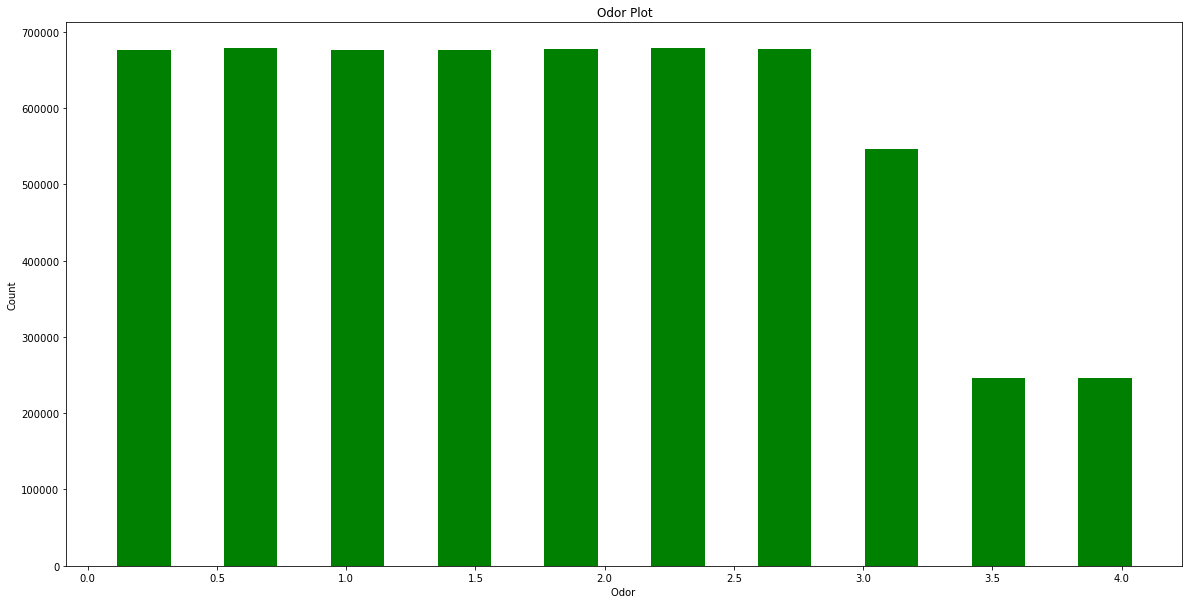

In [19]:
colors = 'green'
plt.figure(figsize=(20,10))
plt.hist(df['Odor'],rwidth=0.5,color=colors)
plt.xlabel('Odor ')
plt.ylabel('Count')
plt.title('Odor Plot')
plt.show()

In [20]:
%%time
df.median().round(3)

CPU times: user 2.34 s, sys: 38.6 ms, total: 2.38 s
Wall time: 2.38 s


<timed eval>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.


Iron                        0.002
Nitrate                     5.604
Chloride                  176.018
Lead                        0.000
Zinc                        1.082
Turbidity                   0.210
Fluoride                    0.775
Copper                      0.348
Odor                        1.774
Sulfate                   134.649
Chlorine                    3.210
Manganese                   0.001
Total Dissolved Solids    265.888
Target                      0.000
dtype: float64

In [21]:
df.isnull().sum()

Iron                       39753
Nitrate                   105725
Chloride                  175531
Lead                       26909
Zinc                      156126
Color                          0
Turbidity                  49815
Fluoride                  189156
Copper                    199402
Odor                      178891
Sulfate                   197418
Chlorine                   57825
Manganese                 109583
Total Dissolved Solids      1670
Source                         0
Month                      95668
Target                         0
dtype: int64

In [22]:
df=df.drop(['Month'],axis=1)
df.columns

Index(['Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Color', 'Turbidity',
       'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Chlorine', 'Manganese',
       'Total Dissolved Solids', 'Source', 'Target'],
      dtype='object')

In [23]:
df['Source'].value_counts()

Stream       734502
Ground       734389
Well         734315
Aquifer      733778
Reservoir    733298
River        732980
Spring       732700
Lake         732618
Other         88262
Name: Source, dtype: int64

In [24]:
df.head(1)

,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,Odor,Sulfate,Chlorine,Manganese,Total Dissolved Solids,Source,Target
0,0.000083,8.605777,122.799772,3.713298e-52,3.434827,Colorless,0.022683,0.607283,0.144599,1.626212,87.266538,3.708178,2.269945e-15,332.118789,Other,0


In [25]:
df['Source'].value_counts()

Stream       734502
Ground       734389
Well         734315
Aquifer      733778
Reservoir    733298
River        732980
Spring       732700
Lake         732618
Other         88262
Name: Source, dtype: int64

In [26]:
df=df.drop(['Source'],axis=1)
df.shape

(5956842, 15)

In [27]:
static = pd.get_dummies(df['Color'])
static.head(1)

,Colorless,Faint Yellow,Light Yellow,Near Colorless,Yellow
0,1,0,0,0,0


In [28]:
df2=pd.concat([df,static],axis=1)
df2.head(2)

,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,Odor,Sulfate,Chlorine,Manganese,Total Dissolved Solids,Target,Colorless,Faint Yellow,Light Yellow,Near Colorless,Yellow
0,0.000083,8.605777,122.799772,3.713298e-52,3.434827,Colorless,0.022683,0.607283,0.144599,1.626212,87.266538,3.708178,2.269945e-15,332.118789,0,1,0,0,0,0
1,0.000081,3.734167,227.029851,7.849262e-94,1.245317,Faint Yellow,0.019007,0.622874,0.437835,1.686049,144.010981,3.292038,8.024076e-07,284.641984,0,0,1,0,0,0


In [29]:
df2.shape

(5956842, 20)

/var/folders/0n/xc9648gx0gsbnhr2j2xllfr00000gn/T/ipykernel_42852/3691463272.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(round(df2.corr(),3),annot=True,cmap='coolwarm')


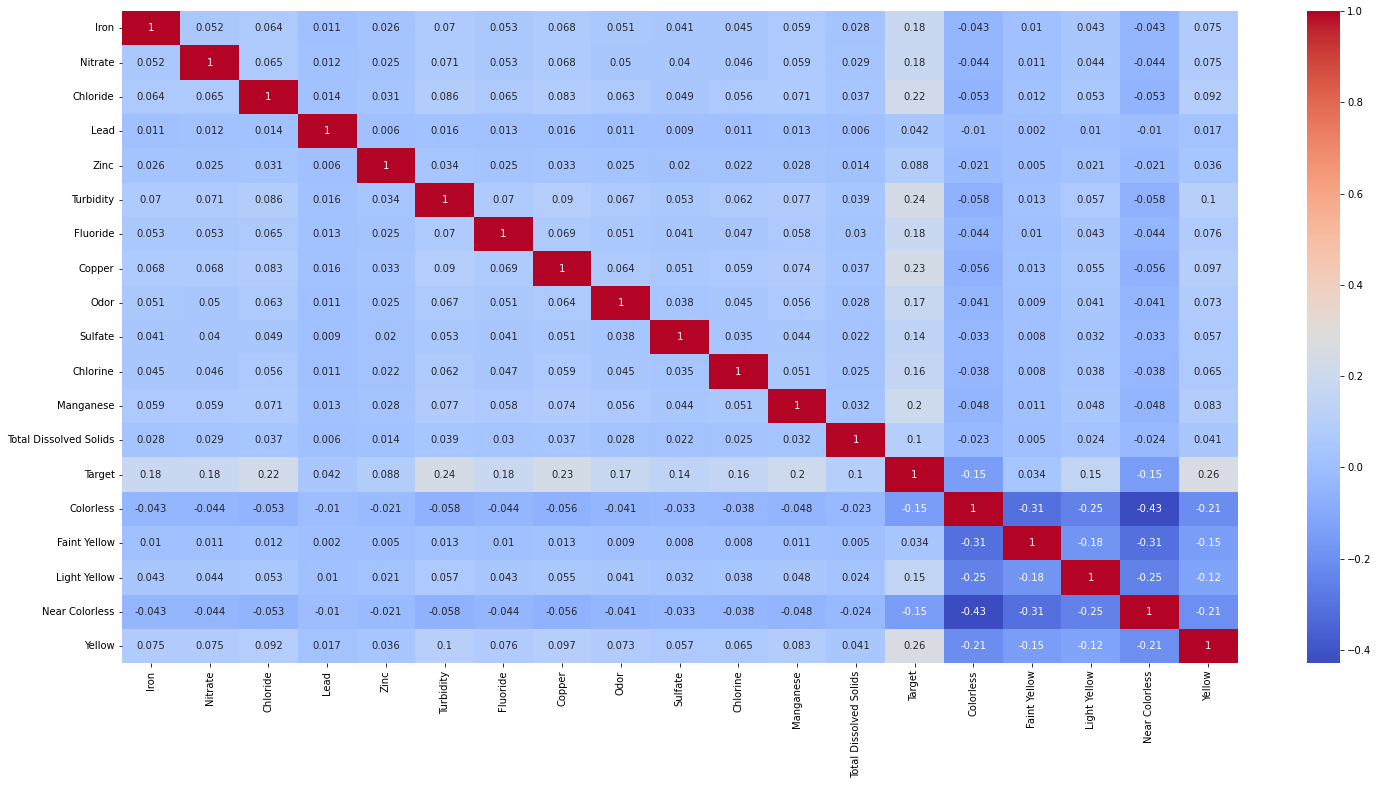

In [30]:
plt.figure(figsize=(25,12))
sns.heatmap(round(df2.corr(),3),annot=True,cmap='coolwarm')
plt.show()

In [31]:
df2.isnull().sum()

Iron                       39753
Nitrate                   105725
Chloride                  175531
Lead                       26909
Zinc                      156126
Color                          0
Turbidity                  49815
Fluoride                  189156
Copper                    199402
Odor                      178891
Sulfate                   197418
Chlorine                   57825
Manganese                 109583
Total Dissolved Solids      1670
Target                         0
Colorless                      0
Faint Yellow                   0
Light Yellow                   0
Near Colorless                 0
Yellow                         0
dtype: int64

In [32]:
df2=df2.drop(['Color'],axis=1)

In [33]:
df2.head(1)

,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Chlorine,Manganese,Total Dissolved Solids,Target,Colorless,Faint Yellow,Light Yellow,Near Colorless,Yellow
0,0.000083,8.605777,122.799772,3.713298e-52,3.434827,0.022683,0.607283,0.144599,1.626212,87.266538,3.708178,2.269945e-15,332.118789,0,1,0,0,0,0


# DATAFRAM 2 WITH REMOVING NULL VALUES

In [34]:
df3=df2.copy()
df3.shape

(5956842, 19)

In [35]:
df3.dropna(axis=0,inplace=True)

In [36]:
df3.shape

(4624831, 19)

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

In [38]:
y=df3['Target']
x=df3.drop(['Target'],axis=1)
x.shape

(4624831, 18)

In [39]:
y.shape

(4624831,)

In [40]:
df3.head()

,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Chlorine,Manganese,Total Dissolved Solids,Target,Colorless,Faint Yellow,Light Yellow,Near Colorless,Yellow
0,0.000083,8.605777,122.799772,3.713298e-52,3.434827,0.022683,0.607283,0.144599,1.626212,87.266538,3.708178,2.269945e-15,332.118789,0,1,0,0,0,0
1,0.000081,3.734167,227.029851,7.849262e-94,1.245317,0.019007,0.622874,0.437835,1.686049,144.010981,3.292038,8.024076e-07,284.641984,0,0,1,0,0,0
2,0.020106,3.816994,230.995630,5.286616e-76,0.528280,0.319956,0.423423,0.431588,3.414619,275.702107,3.560224,7.007989e-02,570.054094,0,0,0,1,0,0
4,0.002167,9.925788,186.540872,4.171069e-132,3.807511,0.004867,0.222912,0.616574,0.795310,175.275175,3.177849,3.296139e-03,168.075545,0,0,0,1,0,0
5,0.000006,1.702584,162.828458,6.102202e-23,3.742464,0.504791,0.054562,0.851326,1.270483,40.853403,3.957842,2.863952e-04,365.639045,0,0,0,0,1,0


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [42]:
%%time
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train,y_train)
print('Train Score = ',log.score(X_train,y_train)*100)
print('Test Score = ' ,log.score(X_test,y_test)*100)

/Users/shivamsourav/opt/anaconda3/lib/python3.9/site-packages/daal4py/sklearn/linear_model/logistic_path.py:459: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Score =  78.00451584166336
Test Score =  78.1098136474058
CPU times: user 14.4 s, sys: 1.16 s, total: 15.5 s
Wall time: 3.85 s


In [43]:
%%time
from sklearn.naive_bayes import MultinomialNB
gnb = MultinomialNB()
gnb.fit(X_train, y_train)
print('Train Score = ',gnb.score(X_train, y_train)*100)
print('Test Score = ' ,gnb.score(X_test,y_test)*100)

Train Score =  60.810532495248474
Test Score =  60.857522484585935
CPU times: user 2.19 s, sys: 873 ms, total: 3.07 s
Wall time: 1.51 s


In [44]:
%%time
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Train Score = ',gnb.score(X_train, y_train)*100)
print('Test Score = ' ,gnb.score(X_test,y_test)*100)

Train Score =  79.84388074804912
Test Score =  79.89960722923088
CPU times: user 2.17 s, sys: 1.75 s, total: 3.92 s
Wall time: 3.43 s


# DATAFRAME WITH FILLING MEAN VALUES

/Users/shivamsourav/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


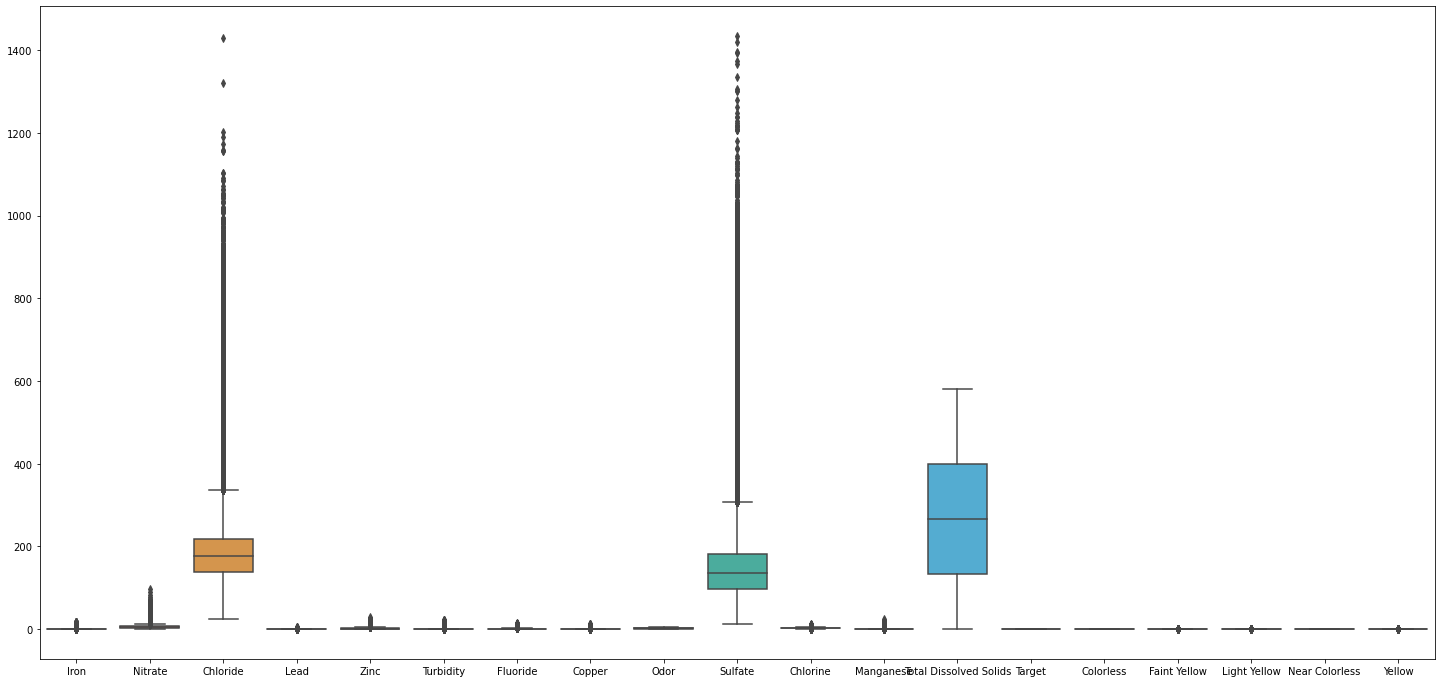

In [45]:
plt.figure(figsize=(25,12))
sns.boxplot(data=df3)
plt.show()

In [46]:
df3['Chloride'].describe().apply("{0:.5f}".format)

count    4624831.00000
mean         184.30504
std           68.42889
min           23.63919
25%          138.14123
50%          176.03036
75%          217.98448
max         1430.54885
Name: Chloride, dtype: object

In [47]:
df3['Sulfate'].describe().apply("{0:.5f}".format)

count    4624831.00000
mean         146.07900
std           68.83829
min           11.94073
25%           97.76527
50%          134.62971
75%          181.76107
max         1434.58654
Name: Sulfate, dtype: object

In [48]:
df3['Nitrate'].describe().apply("{0:.5f}".format)

count    4624831.00000
mean           6.17086
std            3.25762
min            0.28617
25%            3.97328
50%            5.60446
75%            7.67379
max           96.39078
Name: Nitrate, dtype: object

In [49]:
df4=df2.copy()
df4.isnull().sum()

Iron                       39753
Nitrate                   105725
Chloride                  175531
Lead                       26909
Zinc                      156126
Turbidity                  49815
Fluoride                  189156
Copper                    199402
Odor                      178891
Sulfate                   197418
Chlorine                   57825
Manganese                 109583
Total Dissolved Solids      1670
Target                         0
Colorless                      0
Faint Yellow                   0
Light Yellow                   0
Near Colorless                 0
Yellow                         0
dtype: int64

In [50]:
df4.describe()

,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Chlorine,Manganese,Total Dissolved Solids,Target,Colorless,Faint Yellow,Light Yellow,Near Colorless,Yellow
count,5.917089e+06,5.851117e+06,5.781311e+06,5.929933e+06,5.800716e+06,5.907027e+06,5.767686e+06,5.757440e+06,5.777951e+06,5.759424e+06,5.899017e+06,5.847259e+06,5.955172e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06
mean,1.279027e-01,6.169970e+00,1.842970e+02,1.498336e-03,1.550255e+00,5.215093e-01,9.644315e-01,5.161216e-01,1.803459e+00,1.460764e+02,3.255738e+00,1.092802e-01,2.671454e+02,3.030552e-01,3.011075e-01,1.812658e-01,1.272718e-01,2.998626e-01,9.049224e-02
std,4.799915e-01,3.256667e+00,6.842828e+01,3.250641e-02,1.546368e+00,9.258807e-01,8.247870e-01,5.965534e-01,1.069586e+00,6.879844e+01,7.328441e-01,4.761827e-01,1.558586e+02,4.595789e-01,4.587394e-01,3.852383e-01,3.332772e-01,4.581976e-01,2.868857e-01
min,2.047587e-53,2.861727e-01,2.363919e+01,0.000000e+00,1.482707e-08,1.029712e-16,4.550148e-06,2.982735e-10,1.100007e-02,1.194073e+01,9.019921e-01,4.793505e-55,1.048902e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.992949e-06,3.973078e+00,1.381341e+02,1.500283e-122,4.148202e-01,3.872368e-02,3.749503e-01,1.288629e-01,8.921019e-01,9.777114e+01,2.744504e+00,2.522376e-06,1.329157e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.249640e-03,5.604051e+00,1.760178e+02,2.213625e-62,1.081818e+00,2.097680e-01,7.751792e-01,3.479592e-01,1.774284e+00,1.346489e+02,3.209748e+00,6.481943e-04,2.658880e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.455290e-02,7.672402e+00,2.179811e+02,3.592165e-27,2.230841e+00,6.249132e-01,1.341508e+00,7.010104e-01,2.654286e+00,1.817703e+02,3.705217e+00,1.672082e-02,3.984954e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,1.935315e+01,9.639078e+01,1.507310e+03,5.844281e+00,2.836867e+01,2.371527e+01,1.464625e+01,1.207482e+01,4.141998e+00,1.434587e+03,1.256663e+01,2.374086e+01,5.797999e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [51]:
df4.mean()

Iron                        0.127903
Nitrate                     6.169970
Chloride                  184.296981
Lead                        0.001498
Zinc                        1.550255
Turbidity                   0.521509
Fluoride                    0.964431
Copper                      0.516122
Odor                        1.803459
Sulfate                   146.076443
Chlorine                    3.255738
Manganese                   0.109280
Total Dissolved Solids    267.145372
Target                      0.303055
Colorless                   0.301108
Faint Yellow                0.181266
Light Yellow                0.127272
Near Colorless              0.299863
Yellow                      0.090492
dtype: float64

In [52]:
df4.fillna(df4.mean(),inplace=True)

In [53]:
df4.isnull().sum()

Iron                      0
Nitrate                   0
Chloride                  0
Lead                      0
Zinc                      0
Turbidity                 0
Fluoride                  0
Copper                    0
Odor                      0
Sulfate                   0
Chlorine                  0
Manganese                 0
Total Dissolved Solids    0
Target                    0
Colorless                 0
Faint Yellow              0
Light Yellow              0
Near Colorless            0
Yellow                    0
dtype: int64

In [54]:
y=df4['Target']
x=df4.drop(['Target'],axis=1)
x.shape
y.shape

(5956842,)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [56]:
%%time
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train,y_train)
print('Train Score = ',log.score(X_train,y_train)*100)
print('Test Score = ' ,log.score(X_test,y_test)*100)

/Users/shivamsourav/opt/anaconda3/lib/python3.9/site-packages/daal4py/sklearn/linear_model/logistic_path.py:459: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Score =  77.93667071453348
Test Score =  77.9476383891137
CPU times: user 17.6 s, sys: 7.82 s, total: 25.4 s
Wall time: 6.3 s


In [57]:
%%time
from sklearnex.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train,y_train)
print('Train Score = ',log.score(X_train,y_train)*100)
print('Test Score = ' ,log.score(X_test,y_test)*100)

/Users/shivamsourav/opt/anaconda3/lib/python3.9/site-packages/daal4py/sklearn/linear_model/logistic_path.py:459: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Score =  77.93667071453348
Test Score =  77.9476383891137
CPU times: user 17.6 s, sys: 7.73 s, total: 25.3 s
Wall time: 5.8 s


In [58]:
%%time
from sklearn.naive_bayes import MultinomialNB
gnb = MultinomialNB()
gnb.fit(X_train, y_train)
print('Train Score = ',gnb.score(X_train, y_train)*100)
print('Test Score = ' ,gnb.score(X_test,y_test)*100)

Train Score =  61.827461828028405
Test Score =  61.87570769425762
CPU times: user 2.77 s, sys: 767 ms, total: 3.54 s
Wall time: 1.44 s


In [59]:
%%time
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Train Score = ',gnb.score(X_train, y_train)*100)
print('Test Score = ' ,gnb.score(X_test,y_test)*100)

Train Score =  79.80553032196384
Test Score =  79.79030846026714
CPU times: user 2.61 s, sys: 2.69 s, total: 5.3 s
Wall time: 5.53 s


In [60]:
%%time
from sklearnex.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
print('Train Score = ',clf.score(X_train,y_train)*100)
print('Test Score = ' ,clf.score(X_test,y_test)*100)

Train Score =  99.91627273934822
Test Score =  88.21658109284361
CPU times: user 29min 34s, sys: 12min 9s, total: 41min 43s
Wall time: 8min 17s


In [67]:
df4[df['Target']==0]

,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Chlorine,Manganese,Total Dissolved Solids,Target,Colorless,Faint Yellow,Light Yellow,Near Colorless,Yellow
0,0.000083,8.605777,122.799772,3.713298e-52,3.434827,0.022683,0.607283,0.144599,1.626212,87.266538,3.708178,2.269945e-15,332.118789,0,1,0,0,0,0
1,0.000081,3.734167,227.029851,7.849262e-94,1.245317,0.019007,0.622874,0.437835,1.686049,144.010981,3.292038,8.024076e-07,284.641984,0,0,1,0,0,0
2,0.020106,3.816994,230.995630,5.286616e-76,0.528280,0.319956,0.423423,0.431588,3.414619,275.702107,3.560224,7.007989e-02,570.054094,0,0,0,1,0,0
3,0.143988,8.224944,178.129940,3.997118e-176,4.027879,0.166319,0.208454,0.239451,1.803459,147.163233,3.516907,2.468295e-02,100.043838,0,0,0,0,1,0
4,0.002167,9.925788,186.540872,4.171069e-132,3.807511,0.004867,0.222912,0.616574,0.795310,175.275175,3.177849,3.296139e-03,168.075545,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5951116,0.010322,2.780394,205.902390,2.041516e-58,2.907182,0.170415,1.981721,0.728926,1.803459,136.063424,2.169667,2.159094e-02,261.259152,0,1,0,0,0,0
5951117,0.381705,4.010833,138.753431,2.908382e-03,1.396928,2.935545,1.308578,0.000100,3.655343,80.188352,4.276378,2.160117e-04,19.111528,0,0,0,1,0,0
5951118,0.000002,9.249490,175.154127,8.661616e-299,0.360465,0.023153,0.508024,0.778255,1.931525,81.065619,2.086930,4.798445e-03,79.067326,0,1,0,0,0,0
5951119,0.003743,4.113244,212.996174,1.216801e-186,4.701343,2.777685,3.132026,3.837486,2.025294,96.931912,3.398044,1.669595e+00,491.300106,0,0,0,0,1,0


In [115]:
df4[df['Target']==1].head(5)

,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Chlorine,Manganese,Total Dissolved Solids,Target,Colorless,Faint Yellow,Light Yellow,Near Colorless,Yellow
266755,2.619650,1.389334,84.513108,3.337546e-13,1.978032,0.248652,1.691318,2.963968,0.772172,83.813450,5.966624,1.152750e-02,52.369446,1,0,1,0,0,0
266756,1.019157,4.908973,190.443656,4.855934e-39,1.128556,0.000030,0.964431,1.276920,1.160476,84.228139,2.635055,1.672897e-04,232.941036,1,0,0,1,0,0
266757,0.000137,10.552672,211.930128,1.888592e-48,2.848238,0.081378,1.610560,0.460880,1.278813,89.290890,3.265975,7.472054e-12,330.241630,1,1,0,0,0,0
266758,0.000005,5.703348,225.017979,1.917085e-28,0.400466,0.154662,0.070338,0.162591,1.038821,247.846145,3.287618,2.900787e-07,80.026017,1,1,0,0,0,0
266759,0.002560,4.517260,132.104241,1.435747e-13,1.923391,0.010267,1.878288,0.449246,0.938744,146.076443,3.505797,1.632555e-08,67.661410,1,0,0,1,0,0


In [122]:
df5=df4.drop(['Target'],axis=1)

In [123]:
arr=df5.iloc[190000].values.tolist()
y=clf.predict([arr])
if y==[1]:
    print('Pure Water')
else:
    print('Not Pure')

[0]
Not Pure


/Users/shivamsourav/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [119]:
%%time
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
print('Train Score = ',dtc.score(X_train,y_train)*100)
print('Test Score = ' ,dtc.score(X_test,y_test)*100)

Train Score =  100.0
Test Score =  82.04569700907108
CPU times: user 6min 38s, sys: 2.29 s, total: 6min 40s
Wall time: 6min 43s


In [121]:
arr=df5.iloc[190000].values.tolist()
y=dtc.predict([arr])
if y==[1]:
    print('Pure Water')
else:
    print('Not Pure')

Not Pure


/Users/shivamsourav/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
